Importing all needed libraries, tensor flow for initializing weights,keras for dataset , numpy for calculations,matplotlib for plotting

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


Loads MNIST dataset and X_train_full is images for training(60000), Y_train_full is label for training(0-9), x_test is for training 10000 images, y_test is labels for training

In [4]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
X_train_full.shape        # defines for the shape of 60000 dataset of 28x28 

(60000, 28, 28)

In [6]:
X_train_full.dtype       # unsigned integer uint8 uses 8 bits (1 byte memory)

dtype('uint8')

In [7]:
X_valid,X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0         # converting unit to float(0-255)
y_valid,y_train = y_train_full[:5000] ,y_train_full[5000:]
X_test = X_test/255.0                                                          # converting unit to float(0-255)

In [8]:
# for i in y_train:
#     print(i)

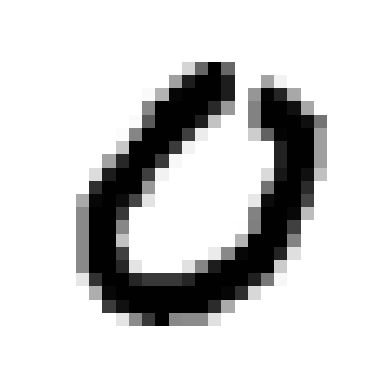

In [9]:
plt.imshow(X_train[7],cmap='binary')
plt.axis('off')
plt.show()

Defining the classes for digits(0-9) in a order

In [10]:
class_names = [0,1,2,3,4,5,6,7,8,9]

Checking whether the given order is  correct or not

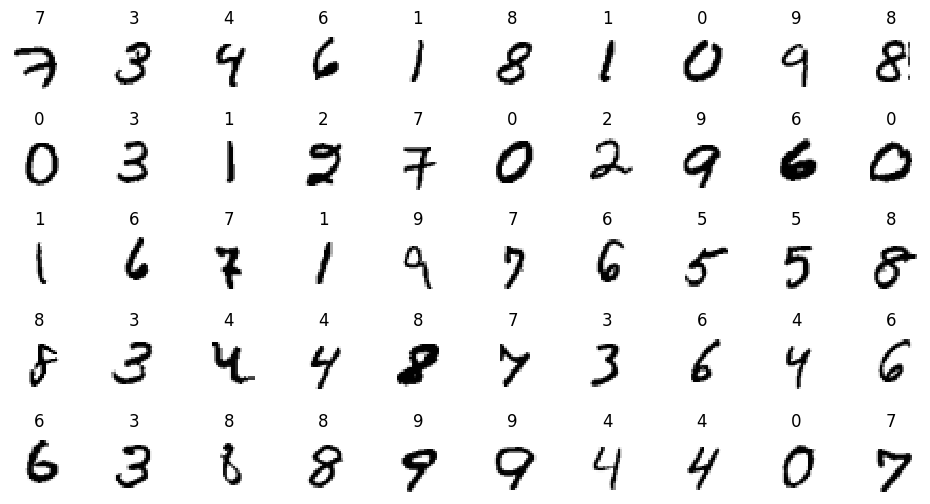

In [11]:
n_rows = 5
n_col = 10
plt.figure(figsize=(n_col*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_col):
        index = row*n_col + col
        plt.subplot(n_rows,n_col,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [12]:
model = keras.models.Sequential()                   # creates a sequential model where layers are added sequentially
model.add(keras.Input(shape=(28,28)))               # input images of size 28x28
model.add(keras.layers.Flatten())                   # flattens the 28x28 matrix as 1D vector of 784 inputs
model.add(keras.layers.Dense(300,activation='relu'))    # creates of 300 neurons and a non-linear layers for complex features
model.add(keras.layers.Dense(100,activation='relu'))    # creates of 100 neurons and a non-linear layers
model.add(keras.layers.Dense(10,activation='softmax'))  # 10 neurons one for each digit(0-9) and probabilities sums up to 1

In [13]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs=3,
                    validation_data=(X_valid,y_valid))

Epoch 1/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7524 - loss: 0.9741 - val_accuracy: 0.9198 - val_loss: 0.2994
Epoch 2/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9130 - loss: 0.3036 - val_accuracy: 0.9350 - val_loss: 0.2331
Epoch 3/3
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9297 - loss: 0.2428 - val_accuracy: 0.9466 - val_loss: 0.1972


In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [19]:
model.get_layer(hidden1.name) is hidden1

True

In [20]:
weights,biases = hidden1.get_weights()

In [21]:
weights

array([[ 0.03131661, -0.06590844, -0.06981898, ...,  0.06443004,
         0.0659034 , -0.01614487],
       [-0.00129446, -0.06838083,  0.03653835, ...,  0.00787789,
        -0.01209218,  0.00466408],
       [ 0.02788191, -0.00988389,  0.02253679, ...,  0.00146268,
        -0.01732272,  0.02330575],
       ...,
       [-0.03023392,  0.03943326, -0.04685312, ..., -0.02907107,
        -0.06631618,  0.03240325],
       [ 0.01461509, -0.06727242,  0.03708558, ..., -0.05384386,
        -0.03796161, -0.04598171],
       [ 0.04232582, -0.02996432,  0.04203752, ..., -0.01600285,
        -0.07242131,  0.05764389]], dtype=float32)

In [22]:
biases.shape

(300,)

In [23]:
biases

array([ 1.05521847e-02,  1.02189751e-02,  1.58302719e-03,  9.92943067e-03,
       -1.60435978e-02,  1.08266966e-02, -1.59633462e-03, -3.71743948e-03,
        1.64172035e-02,  2.63236370e-02,  1.94958150e-02,  3.19107901e-03,
        2.39558029e-03, -2.53516305e-02,  6.57685660e-03,  9.49248858e-03,
        2.08375566e-02,  1.55473240e-02,  2.85289213e-02, -3.53067135e-03,
        8.69775750e-03, -2.44924203e-02,  1.03355190e-02, -1.14445167e-03,
       -6.51755976e-03,  6.21140050e-03,  6.39381073e-03,  1.95450317e-02,
        1.59936752e-02, -6.07117731e-03,  2.41706427e-02,  9.47639532e-03,
        1.20587954e-02,  1.21225845e-02,  4.84616589e-03,  1.58025250e-02,
        1.60042662e-02,  1.50950719e-02,  7.00353226e-03,  2.47910246e-02,
        5.94136976e-02,  8.46608018e-04, -2.54932418e-03, -6.16002036e-03,
        1.73959788e-02, -9.95892333e-04,  1.20051745e-02, -3.52564733e-03,
        5.89715969e-03,  6.69884589e-03, -5.76531856e-05,  3.07788961e-02,
        1.46536659e-02, -

In [24]:
history.epoch

[0, 1, 2]

In [25]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

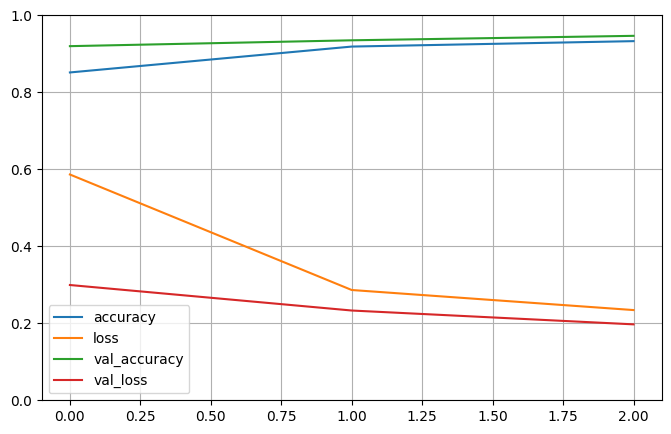

In [26]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9307 - loss: 0.2409


[0.20663237571716309, 0.9412999749183655]

In [28]:
x_new = X_test[:10]

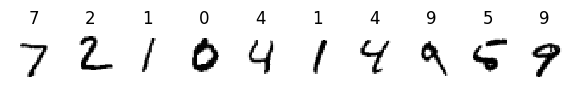

In [29]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,10,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [30]:
y_pred = np.argmax(model.predict(x_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [31]:
np.array(class_names)[y_pred]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

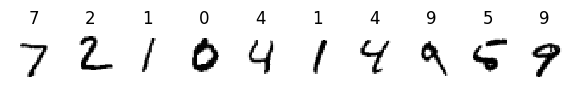

In [32]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,10,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [33]:
model.save('handwritten_model.keras')

In [34]:
import cv2
import numpy as np
from tensorflow import keras

def preprocess_and_predict(image_path, model):
    # Load as grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize to 28x28
    img = cv2.resize(img, (28, 28))
    
    # Check if background is white (mean > 127), then invert
    if np.mean(img) > 127:
        img = 255 - img

    # Normalize
    img = img / 255.0

    # Reshape according to model input
    if len(model.input_shape) == 4:  # (None, 28, 28, 1)
        img = img.reshape(1, 28, 28, 1)
    else:  # (None, 28, 28)
        img = img.reshape(1, 28, 28)

    # Predict
    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)

    print("Predicted probabilities:", prediction)
    print("Predicted digit:", predicted_label)
    return predicted_label


In [35]:
preprocess_and_predict("digit.jpg",model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Predicted probabilities: [[2.05003168e-03 7.04319473e-06 1.18718326e-01 2.50803024e-01
  1.67766164e-04 3.58825117e-01 3.30847735e-03 7.43413111e-04
  2.64559239e-01 8.17558728e-04]]
Predicted digit: 5


5

Predicting a Image that contain more that one digits

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
model = load_model("handwritten_model.keras")

# defining functions for resizing img
def resize_and_pad(roi):
    
    # aspect ratio
    h, w = roi.shape
    if h > w:
        new_h = 20
        new_w = int(w * (20 / h))
    else:
        new_w = 20
        new_h = int(h * (20 / w))

    resized = cv2.resize(roi, (new_w, new_h))
    
    # 28x28 black image and paste resized digit at center
    padded = np.zeros((28, 28), dtype=np.uint8)
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2
    padded[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized

    return padded

def split_and_predict_digits(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    sorted_contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

    predictions = []

    for contour in sorted_contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 10 and h > 10:
            roi = thresh[y:y+h, x:x+w]

            roi = resize_and_pad(roi)

            roi = roi.astype('float32') / 255.0
            roi = roi.reshape(1, 28, 28, 1)

            pred = model.predict(roi,verbose=0)
            digit = np.argmax(pred)
            predictions.append(digit)

    return predictions



calling the function

In [42]:
result = split_and_predict_digits('OIP 7.jpg')
result = [str(i) for i in result]
print('Predicted result:',''.join(result))

Predicted result: 13540


In [50]:
result = split_and_predict_digits('OIP 8.png')
result = [str(i) for i in result]
print('Predicted result:',''.join(result))

Predicted result: 0196384156


In [52]:
result = split_and_predict_digits('OIP 9.jpg')
result = [str(i) for i in result]
print('Predicted result:',''.join(result))

Predicted result: 
